<a href="https://colab.research.google.com/github/bab81/AI-Algorithms/blob/main/26_Feature_Extraction_Pre-trained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pre-trained models

We can choose a pre-trained model based on our application:

Image Classificatation:

*   GoogLeNet(2015)
*   VGGNet
*   ResNet

Text Classification:

*   BERT
*   RoBERTa 



#CLIP: Connecting Text and Images

https://openai.com/blog/clip/

https://github.com/openai/CLIP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
!pip install git+https://github.com/openai/CLIP.git
import clip
import torch

from sklearn.metrics  import classification_report,confusion_matrix,ConfusionMatrixDisplay

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-mkwcvcrr
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-mkwcvcrr
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.7 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369398 sha256=d45b3427065d074774f0c4c4114b7bd84750f826dfa23ccc49a493501f3d51ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-s94avusd/wheels/c8/e4/e1/11374c111387672fc2068dfbe0d4b424cb9cdd1b2e184a71b5
Successfully built clip


In [2]:
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
device

'cuda'

In [5]:
model, preprocess = clip.load('ViT-B/32', device=device)

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 159MiB/s]


In [11]:
image = preprocess(Image.open("dog.jpeg")).unsqueeze(0).to(device)
text = clip.tokenize(["a diagram", "a dog", "a cat", "a man"]).to(device)

In [12]:
image.shape

torch.Size([1, 3, 224, 224])

In [13]:
text.shape

torch.Size([4, 77])

In [14]:
with torch.no_grad():
    image_features = model.encode_image(image.to(device))
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

In [15]:
probs

array([[0.00488, 0.974  , 0.00374, 0.01703]], dtype=float16)

##MNIST

In [16]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [17]:
x_test[0].shape #numpy array

(28, 28)

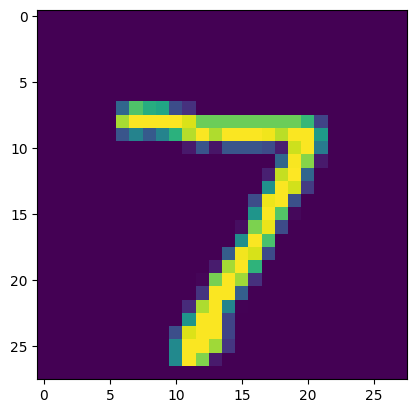

In [18]:
plt.imshow(x_test[0])

In [19]:
image = preprocess(Image.fromarray(x_test[0])).unsqueeze(0).to(device)
text = clip.tokenize(["zero","one","two","three","four","five","six","seven","eight",'nine']).to(device)

In [20]:
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

In [21]:
probs

array([[0.00199 , 0.004345, 0.11926 , 0.082   , 0.0619  , 0.1847  ,
        0.03363 , 0.4502  , 0.03995 , 0.02206 ]], dtype=float16)

In [22]:
np.argmax(probs)

7

#CIFAR10

https://www.cs.toronto.edu/~kriz/cifar.html

In [23]:
from keras.datasets import cifar10, cifar100
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [24]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [25]:
x_train.shape

(50000, 32, 32, 3)

In [26]:
x_test.shape

(10000, 32, 32, 3)

[9]


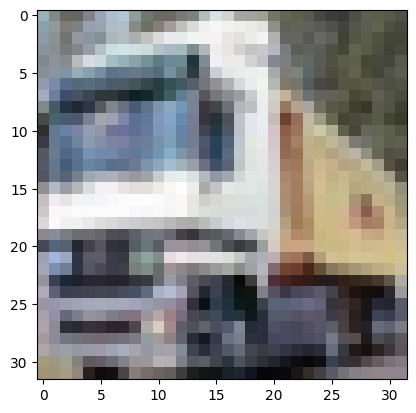

In [27]:
print(y_train[1])
plt.imshow(x_train[1])

###CIFAR - PCA

(0.0, 20.0)

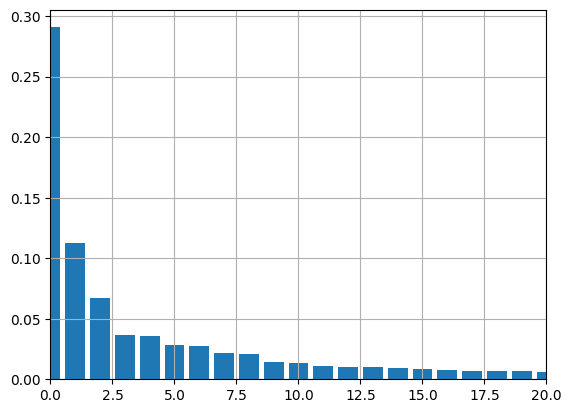

In [28]:
Model_CIFAR_PCA = PCA()
Model_CIFAR_PCA.fit(x_train.reshape(50000,32*32*3))
x_train_PCA = Model_CIFAR_PCA.transform(x_train.reshape(50000,32*32*3))
x_test_PCA = Model_CIFAR_PCA.transform(x_test.reshape(10000,32*32*3))

plt.bar([i for i in range(len(Model_CIFAR_PCA.explained_variance_ratio_))],Model_CIFAR_PCA.explained_variance_ratio_)
plt.grid()
plt.xlim([0,20])

In [29]:
sum(Model_CIFAR_PCA.explained_variance_ratio_[:100])

0.9010623230457745

In [30]:
Number_Features=100

Model_CIFAR_PCA_Linear=LogisticRegression(max_iter=1000,solver='liblinear')
Model_CIFAR_PCA_Linear.fit(x_train_PCA[:,0:Number_Features],y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, solver='liblinear')

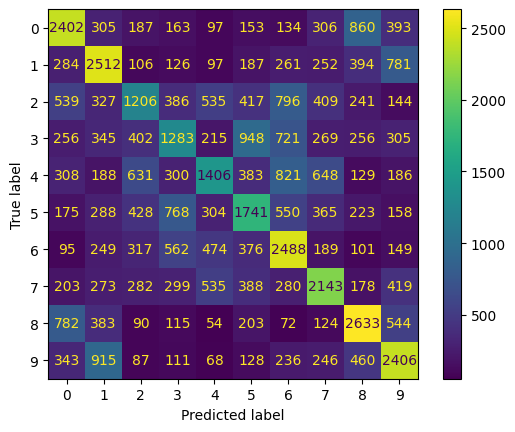

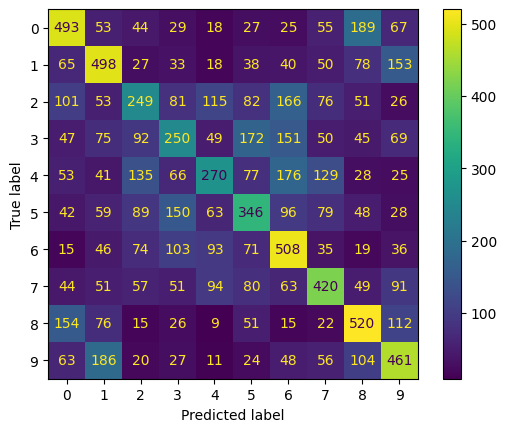

In [31]:
ConfusionMatrixDisplay(confusion_matrix(y_train,Model_CIFAR_PCA_Linear.predict(x_train_PCA[:,0:Number_Features]))).plot()
ConfusionMatrixDisplay(confusion_matrix(y_test,Model_CIFAR_PCA_Linear.predict(x_test_PCA[:,0:Number_Features]))).plot()

##CIFAR-CLIP

In [32]:
x_train_CLIP_features=[]
with torch.no_grad():
  for pic in x_train:
    image = preprocess(Image.fromarray(pic)).unsqueeze(0).to(device)
    image_features = model.encode_image(image.to(device))
    x_train_CLIP_features.append(image_features.cpu().numpy()[0])

In [33]:
x_test_CLIP_features=[]
with torch.no_grad():
  for pic in x_test:
    image = preprocess(Image.fromarray(pic)).unsqueeze(0).to(device)
    image_features = model.encode_image(image.to(device))
    x_test_CLIP_features.append(image_features.cpu().numpy()[0])

In [34]:
len(x_train_CLIP_features)

50000

In [35]:
Model_CIFAR_CLIP_Linear=LogisticRegression(max_iter=1000,solver='liblinear')
Model_CIFAR_CLIP_Linear.fit(x_train_CLIP_features,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, solver='liblinear')

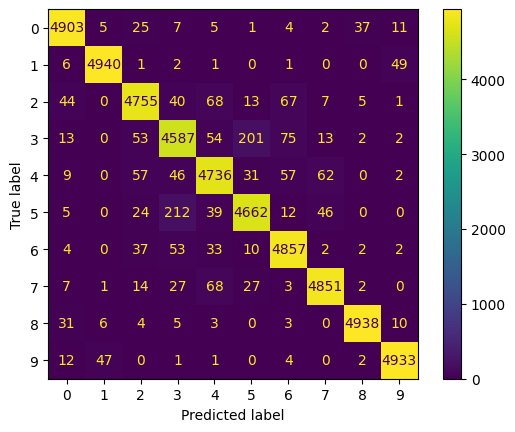

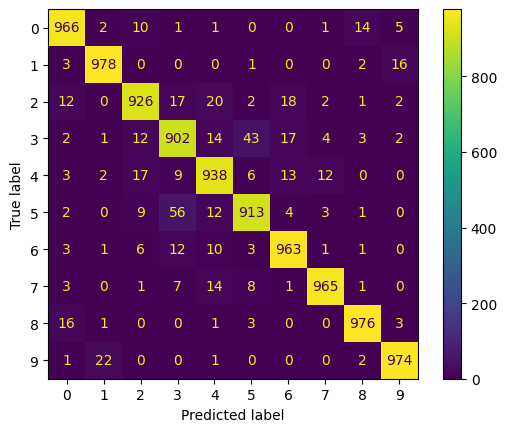

In [36]:
ConfusionMatrixDisplay(confusion_matrix(y_train,Model_CIFAR_CLIP_Linear.predict(x_train_CLIP_features))).plot()
ConfusionMatrixDisplay(confusion_matrix(y_test,Model_CIFAR_CLIP_Linear.predict(x_test_CLIP_features))).plot()